# Regularisation

what I want to demonstrate is the output of all of these regularisation methods.That's Ridge regression, lasso regression.

I'm going to look briefly at another one which is a combination of those 2L1 and L2 called elastic net.

The main focus that they have is to prevent overfitting and also reducing the weights.

one of the the situation where it works to its best is when you get a poorly conditioned data set that's a data set with noise in it, with multicolinearity between the variables.

It just so happens that a lot of the data sets that come with SK Lauren, like the diabetes data set, breast cancer, you know, iris data set are all well conditioned, kind of robust. And that's the reason they're used.nThey wouldn't be used if they were necessarily poor data sets.

But if you do come across data, again, another problem that I mentioned as well as if you've too little data and too many features, again, that's a poor it's it's not a great data set to have to demonstrate algorithms on, but it's a data set that people often encounter in the real world.

But it's in those scenarios for Ridge regression really, and all the different regularisation methods really come into their own.

But what you'll always see is that Ridge regression will always have lower coefficients, which means it's less sensitive and it's got lower variance.

And that really is the big advantage is this increasing the bias through the penalty to lower the variance.

## First - Synthesised data and Ridge Regression

In this first example, we will look at synthesised data and see how ridge regression compares with linear regression

Step 1: Import necessary libraries

In [31]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.metrics import mean_squared_error
import seaborn as sns

Synthesize a dataset with make_regression (https://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_regression.html) and split the data into training and testing sets.

I'm doing a bit of a fix here with random_state = 20. Also doing some rigging here with test_size=0.85 to demonstrate high variance. This sensitivity to the training data will be mitigated by increasing bias (the ridge regression penalty) to reduce the model variance.

The other thing I'm doing is I'm rigging here the test sites because I have 100 samples, but that's quite a lot of data where you've only got a single feature.

So what you also see then is if you've got loads of data going in, there's not as much of a difference between Ridge regression and linear regression.

Like linear regression does quite a good job because the variance is going to be low if that, if it's training on 80 samples, you know, with only a single dimension, it's going to fit a really good line.

So what I'm doing here is I'm setting the test size, which would normally be nought .2 or nought .25.

I'm setting it to nought .85, meaning that it's only being trained on quite a small portion of the data, nought .85.

To introduce this kind of artificially introduce the variance to show what it would be like in the real world if you were short on data.

In [32]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=20)  #Bit of a fix going on here with random_state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)  #Also doing some rigging here with test_size=0.85 to demonstrate high variance 

Initialize and train the Linear Regression and Ridge Regression models.
 
With Ridge Regression, use cross-validation for tuning lambda (Note: the word lambda is reserved by the Python language, so alpha is used instead)

Next, make predictions using both models and evaluate performance using Mean Squared Error (MSE)

What I'm going to doing is setting off my Ridge and I'm going to do cross validation because I need to tune Lambda.

if you pick Lambda at random often you won't get great performance.

What log space does, It's very similar in that it spaces points, but it spaces them according to a log scale.

So what this is, it'll be 10 to the -4, which is 0.000110 to the -310 to the -210 to the -1, which is 0.1 all the way up to 10 to the zero, which is 110 to the one is 10, going all the way up to 10 to the four, which is 10,000.

So there's nine points.

So that's my log space.

I can try different scales, like a really small, really, really small lambda's and quite, you know, lambda's around 1:00, lambda's around 10 all the way up.

In [33]:
lr = LinearRegression()

alphas = np.logspace(-4, 4, 9)  # Range of alpha values (log scale)
rr_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation
rr_cv.fit(X_train, y_train)

# Make predictions
lr_pred = lr.fit(X_train, y_train).predict(X_test)
rr_pred = rr_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, lr_pred)
rr_mse = mean_squared_error(y_test, rr_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter

Linear Regression MSE (test set): 450.17
Ridge Regression MSE (test set): 448.33
Best alpha (lambda) for Ridge Regression: 1.00000


Next, let's have a look at the coefficients for both models. As expected, the penalty term has made the coefficients smaller (meaning they're slightly less sensitive to the inputs)

But what you do see, the big difference is when we look at the coefficients.

So we can see here linear regression, slope and intercept is 97 and 1.492 and 1.15.

They're smaller.

And what you'll see is if you run this multiple times with different seeds, you'll see that sometimes this is going to be flipped, but you'll always see this pattern, which is essentially means that it's got less sensitivity.

In [34]:
print("\nLinear regression coefficient:", lr.coef_)
print("Linear regression intercept:", lr.intercept_)

print("\nRidge regression coefficient:", rr_cv.coef_)
print("Ridge regression intercept:", rr_cv.intercept_)


Linear regression coefficient: [97.74253971]
Linear regression intercept: 1.4230434087617017

Ridge regression coefficient: [94.35834942]
Ridge regression intercept: 1.1514384996764147


### Plot the results

As expected the slope for ridge regression is less than that of linear regression. We can also see that the performance is better but that's been fixed above. In general, in simple cases like this, the ridge regression penalty just makes MSE worse

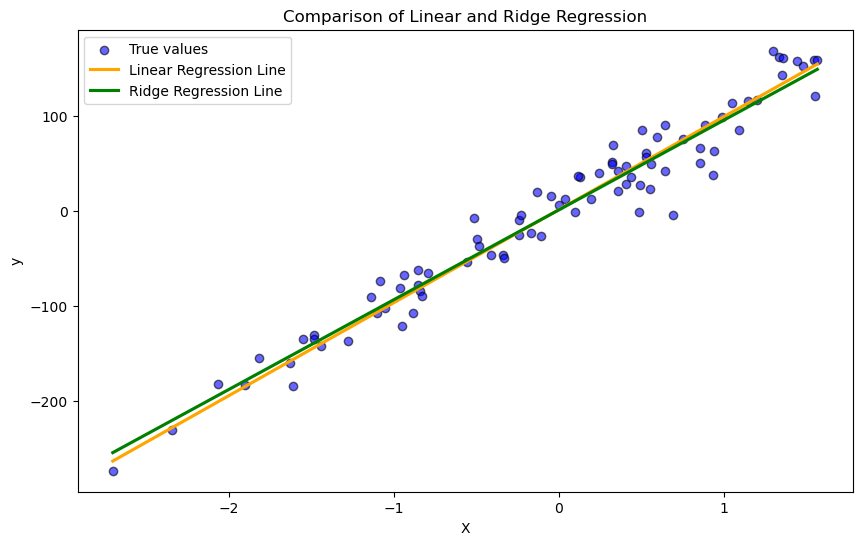

In [35]:
plt.figure(figsize=(10, 6))

# Scatter plot of the true values vs predicted values 
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='True values', edgecolors='k')

# Adding the Linear Regression Line 
sns.regplot(x=X_test.flatten(), y=lr_pred, scatter=False, color='orange', label='Linear Regression Line')

# Adding the Ridge Regression Line 
sns.regplot(x=X_test.flatten(), y=rr_pred, scatter=False, color='green', label='Ridge Regression Line')


plt.title('Comparison of Linear and Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


And no matter how many times, because this slope coefficient is always going to be smaller, no matter how many times you're runish, you're always going to get a slightly shallower slope.

So here is my linear regression line in yellow.

And you can see here, it's just slightly less of a slope on the green line here.

But they're both good fits.

Really, they're both good fits to the data.

Sometimes you get different behaviour depending upon the size you pick for training and test.

This is just kind of demonstrating it again.

So what are we looking at?

We're looking at the true values for our X&Y, our single dimensional data, our single input and our output.

And we're looking at also our best fit line for both.

## A more real-world example - Diabetes Dataset again

In this example, we'll look again at the Diabetes dataset in sklearn and the impact Ridge Regression has

Let's load the diabetes dataset and setup X and y. We've seen this before

In [36]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# noise = np.random.normal(0, 40, size=y.shape)  # add random noise to the target
# y = y + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


Same as above, initialize and train the Linear Regression and Ridge Regression models (cross-validation for tuning lambda)

Next, make predictions using both models and evaluate performance using Mean Squared Error (MSE)

In [37]:
lr = LinearRegression()

alphas = np.logspace(-4, 4, 9)  # Range of alpha values (log scale)
rr_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation
rr_cv.fit(X_train, y_train)

# Make predictions
lr_pred = lr.fit(X_train, y_train).predict(X_test)
rr_pred = rr_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, lr_pred)
rr_mse = mean_squared_error(y_test, rr_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter

Linear Regression MSE (test set): 2900.19
Ridge Regression MSE (test set): 2856.49
Best alpha (lambda) for Ridge Regression: 0.10000


So exactly is the same as a cold before I'm setting up my alphas, do my cross validation, get my predictions for both, my mean squared error for both and again, I see, you know, but again, this will change the more you use it or the every time you use it.

The Ridge regression and linear regression mean squared errors where there's a small difference in it.


Next, let's have a look at the coefficients for both models. As expected again, the penalty term has made the coefficients smaller (meaning they're slightly less sensitive to the inputs). Also, the sum of the coefficients is significantly smaller

In [38]:
sumCoef=0

#Display the coefficients for both models
print("Ridge regression coefficients:")
for feature, coef in zip(X.columns, rr_cv.coef_):
    print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print(sumCoef)

print("\nLinear regression coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef) # taking the absolute value of all the coefficients and adding them up.
    # if not abs, the -ve will affect +ve if u add them up

print(sumCoef)

Ridge regression coefficients:
age: 42.856
sex: -205.494
bmi: 505.089
bp: 317.093
s1: -108.500
s2: -86.237
s3: -190.363
s4: 151.707
s5: 392.289
s6: 79.908
2079.536984463997

Linear regression coefficients:
age: 37.904
sex: -241.964
bmi: 542.429
bp: 347.704
s1: -931.489
s2: 518.062
s3: 163.420
s4: 275.318
s5: 736.199
s6: 48.671
5922.69649433042


But again, if you look at the coefficients for both models, as expected, the penalty term has made the coefficients really small, meaning they're slightly less sensitive to the inputs and the sum is significantly smaller.


Some of the coefficients are smaller in linear regression, but by and large, the absolute value with the magnitude of the coefficients in Ridge regression are smaller.

And it's very obvious if we look at the sum of all the coefficients, which is here 2079 for Ridge at 5922 for linear regression.

So it's really obvious that even though the the performance is similar, ridge has a lot less potential for variance and a lot less sensitive than linear regression.

So it's optimal in that sense, in the sense of its insensitivity.

### Plot the results

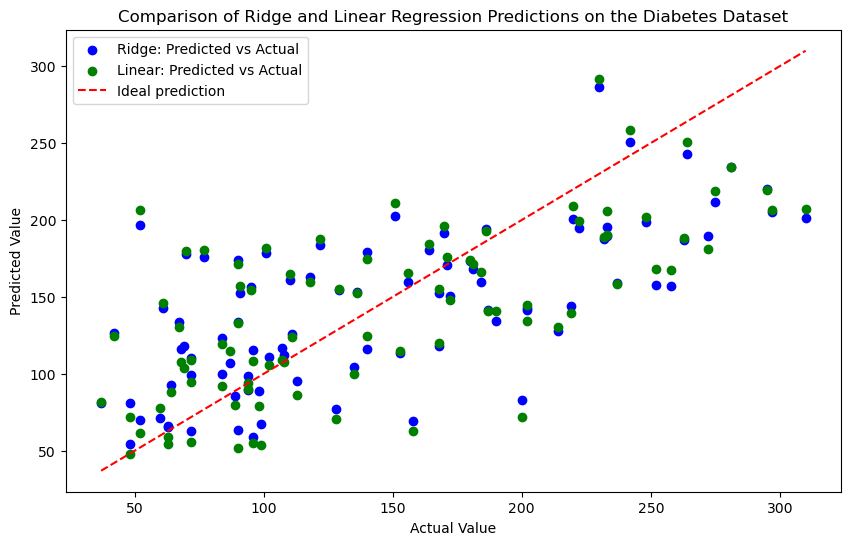

In [39]:
plt.figure(figsize=(10, 6))

# Plotting actual values vs predicted values for both models
plt.scatter(y_test, rr_pred, color='blue', label='Ridge: Predicted vs Actual')
plt.scatter(y_test, lr_pred, color='green', label='Linear: Predicted vs Actual')

# Ideal prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal prediction')

plt.title('Comparison of Ridge and Linear Regression Predictions on the Diabetes Dataset')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

What I'm printing here is the actual value versus the predicted value.

So in a real world, say, if my actual value was 150, I'd also expect my predicted value to be 150.

So this red line that I've drawn here is the ideal line of where everything would fall in an ideal prediction.

But what I'm actually seeing is the predicted versus actual for Ridge in blue and for linear regression in green.

And the closer I am to the red line, the better the prediction.

So in this case right here where there's an actual value of 200 or something very close to 201, nine, nine or something, Ridge regression is giving me a better solution closer to the red line than linear.

And we can see it throughout.

But in some cases, you know, we'll find linear is better. But overall performance is quite similar.

We can see with mean squared error that there's not a whole lot that there's an edge slightly in ritual regression, but you'll get that flipped if you rerun this again.

But what you won't get flipped is this sensitivity.

## Let's look at Lasso Regularisation with the diabetes dataset

elastic nest regression, lasso regression, lasso regression regularisation, they're all kind of similar, but you'll see even in the SK learned documentation, it's called lasso regression and elastic net regression and regression.

In [40]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Ridge
print(f"Lasso Regression MSE (test set): {lasso_mse:.2f}")
print(f"Best alpha (lambda) for Lasso Regression: {lasso_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Lasso

Linear Regression MSE (test set): 2900.19
Ridge Regression MSE (test set): 2856.49
Best alpha (lambda) for Ridge Regression: 0.10000
Lasso Regression MSE (test set): 2798.19
Best alpha (lambda) for Lasso Regression: 0.10000


LASSO in this case is actually doing a bit better again, but again, it's kind of you'll find it interchanges

### Plot the results

Let's have a look at the results for all 3 models

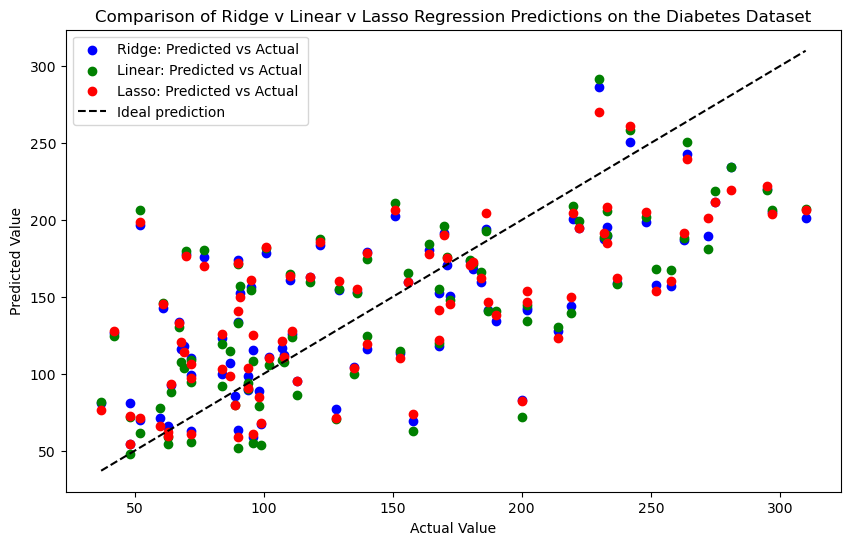

In [41]:
plt.figure(figsize=(10, 6))

# Plotting actual values vs predicted values for all 3 models
plt.scatter(y_test, rr_pred, color='blue', label='Ridge: Predicted vs Actual')
plt.scatter(y_test, lr_pred, color='green', label='Linear: Predicted vs Actual')
plt.scatter(y_test, lasso_pred, color='red', label='Lasso: Predicted vs Actual')

# Ideal prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Ideal prediction')

plt.title('Comparison of Ridge v Linear v Lasso Regression Predictions on the Diabetes Dataset')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

But by looking at MSE, we can see that overall LASSO is doing the best.

Let's go back up to the top now and edit the noise parameter.

Ridge usually performs better when:

- The data has multicollinearity: Features are highly correlated, and ridge can prevent overfitting.
- The dataset has a large number of features (especially when there are more features than data): Regularization helps in controlling complexity, especially when there some irrelevant features.
- The dataset has noise: Ridge can reduce the model's sensitivity to noise.

So, let's introduce some noise



In [42]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

noise = np.random.normal(0, 40, size=y.shape)  # add random noise to the target
y = y + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.head())

lr = LinearRegression()

alphas = np.logspace(-4, 4, 9)  # Range of alpha values (log scale)
rr_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation
rr_cv.fit(X_train, y_train)

# Make predictions
lr_pred = lr.fit(X_train, y_train).predict(X_test)
rr_pred = rr_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, lr_pred)
rr_mse = mean_squared_error(y_test, rr_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter

sumCoef=0

#Display the coefficients for both models
print("Ridge regression coefficients:")
for feature, coef in zip(X.columns, rr_cv.coef_):
    print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print(sumCoef)

print("\nLinear regression coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef) # taking the absolute value of all the coefficients and adding them up.
    # if not abs, the -ve will affect +ve if u add them up

print(sumCoef)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
Linear Regression MSE (test set): 4076.70
Ridge Regression MSE (test set): 4107.32
Best alpha (lambda) for Ridge Regression: 0.10000
Ridge regression coefficients:
age: 45.596
sex: -211.244
bmi: 524.245
bp: 297.577
s1: -131.741
s2: -105.797
s3: -191.120
s4: 126.126
s5: 387.716
s6: 166.277
2187.4388765156177

Linear regression coefficients:
age

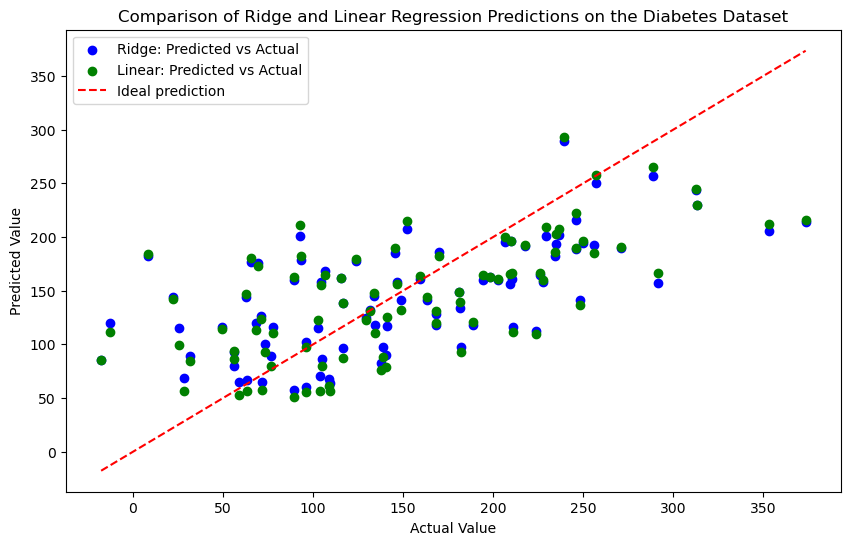

In [43]:
plt.figure(figsize=(10, 6))

# Plotting actual values vs predicted values for both models
plt.scatter(y_test, rr_pred, color='blue', label='Ridge: Predicted vs Actual')
plt.scatter(y_test, lr_pred, color='green', label='Linear: Predicted vs Actual')

# Ideal prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal prediction')

plt.title('Comparison of Ridge and Linear Regression Predictions on the Diabetes Dataset')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

In [44]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Ridge
print(f"Lasso Regression MSE (test set): {lasso_mse:.2f}")
print(f"Best alpha (lambda) for Lasso Regression: {lasso_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Lasso

Linear Regression MSE (test set): 4076.70
Ridge Regression MSE (test set): 4107.32
Best alpha (lambda) for Ridge Regression: 0.10000
Lasso Regression MSE (test set): 4017.46
Best alpha (lambda) for Lasso Regression: 0.10000


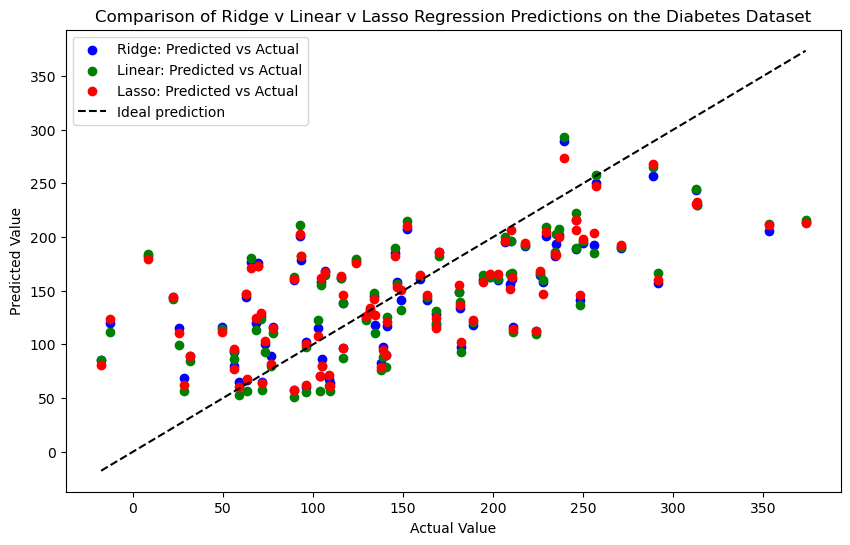

In [45]:
plt.figure(figsize=(10, 6))

# Plotting actual values vs predicted values for all 3 models
plt.scatter(y_test, rr_pred, color='blue', label='Ridge: Predicted vs Actual')
plt.scatter(y_test, lr_pred, color='green', label='Linear: Predicted vs Actual')
plt.scatter(y_test, lasso_pred, color='red', label='Lasso: Predicted vs Actual')

# Ideal prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Ideal prediction')

plt.title('Comparison of Ridge v Linear v Lasso Regression Predictions on the Diabetes Dataset')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

if you look at the coefficients and the sensitivity of the model, you will always, you'll always see an improvement in that regard.

## Finally, Regularisation is built into many models in SKLearn - see below

penalty can be L1, L2 or ElasticNet which is a combination of L1 and L2 penalties

In [46]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

## ElasticNet

ElasticNet is a combination of the L1 and L2 penalties. It defaults to a 50/50 influence in sklearn

In [47]:
from sklearn.linear_model import ElasticNetCV

en_cv = ElasticNetCV(alphas=alphas, cv=5)
en_cv.fit(X_train, y_train)

# Make predictions
en_pred = en_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
en_mse = mean_squared_error(y_test, en_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Ridge
print(f"Lasso Regression MSE (test set): {lasso_mse:.2f}")
print(f"Best alpha (lambda) for Lasso Regression: {lasso_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Lasso
print(f"ElasticNet Regression MSE (test set): {en_mse:.2f}")
print(f"Best alpha (lambda) for ElasticNet Regression: {en_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Lasso

Linear Regression MSE (test set): 4076.70
Ridge Regression MSE (test set): 4107.32
Best alpha (lambda) for Ridge Regression: 0.10000
Lasso Regression MSE (test set): 4017.46
Best alpha (lambda) for Lasso Regression: 0.10000
ElasticNet Regression MSE (test set): 4112.70
Best alpha (lambda) for ElasticNet Regression: 0.00100


the best alpha is actually nought .1.

That just means depending on what the coefficients are, but that like the bigger this number, the more it shows that Ridge regression is significant.

Again, it's something you can look at if you're playing around with regularisation to see what the Lambda term is or the alpha term is.

It's here like what does Lambda come out as?

And it'll come out, you know, we're training this with cross validation.

But if you come across a data set and you'd think regularisation might help, you can view that Lambda term once you do cross validation and it will give you an indicator of, yeah, how much it's actually helping, what is it doing, you know, But even though Lambda is small in these cases, we can still see from the coefficients when we printed them out, when we printed out the sum, we could do the same thing.

Just go down to the very bottom and print out the coefficients for all of the So want to do Ridge linear, I want to do elastic net, and I want to do lasso as well.

In [48]:
sumCoef=0

#Display the coefficients for all models
for feature, coef in zip(X.columns, rr_cv.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("Ridge regression coefficient sum:")
print(sumCoef)

for feature, coef in zip(X.columns, lasso_cv.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("\nLasso regression coefficient sum:")
print(sumCoef)

for feature, coef in zip(X.columns, en_cv.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("\nElasticNet regression coefficient sum:")
print(sumCoef)

for feature, coef in zip(X.columns, lr.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("\nLinear regression coefficient sum:")
print(sumCoef)

Ridge regression coefficient sum:
2187.4388765156177

Lasso regression coefficient sum:
4127.643886446871

ElasticNet regression coefficient sum:
6184.492400184891

Linear regression coefficient sum:
10110.192487540027


Get the lowest sum of coefficients as the best regulaisation
linear is worst